# Coding 1-D linear regression

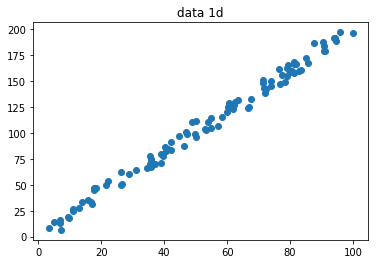

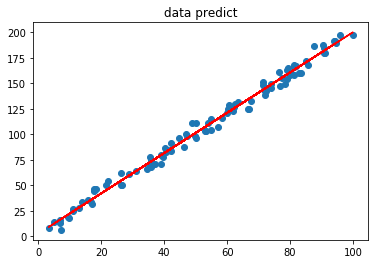

r_square =  0.9911838202977805


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# load data
X = []
Y = []

with open('data_1d.csv', 'r') as f:
    lines = f.readlines()
    
for line in lines:
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.title('data 1d')
plt.show()

# apply the equations
denominator = np.mean(np.square(X)) - np.square(np.mean(X))

a = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / denominator
b = (np.mean(np.square(X)) * np.mean(Y) - np.mean(X) * np.mean(X * Y)) / denominator

Yhat = a * X + b
plt.scatter(X, Y)
plt.plot(X, Yhat, color='r')
plt.title('data predict')
plt.show()

d1 = Y - Yhat
d2 = Y - Y.mean()
r_square = 1 - d1.dot(d1) / d2.dot(d2)
print('r_square = ', r_square)





# Section 2, Lecture 8: Moore law

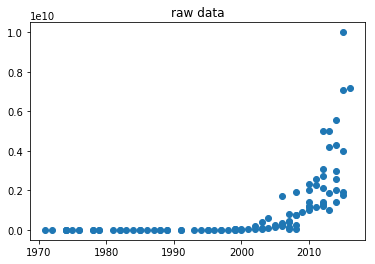

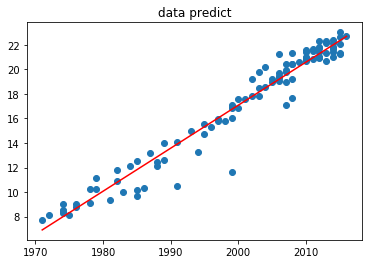

r_square =  0.952944285228576
time to double:  1.9745331723797188


In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt

# load data
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')
with open('moore.csv', 'r') as f:
    lines = f.readlines()
    
for line in lines:
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(float(x))
    Y.append(float(y))

X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.title('raw data')
plt.show()

Y = np.log(Y)
# apply the equations
denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - X.mean() * Y.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

Yhat = a * X + b
plt.scatter(X, Y)
plt.plot(X, Yhat, color='r')
plt.title('data predict')
plt.show()

d1 = Y - Yhat
d2 = Y - Y.mean()
r_square = 1 - d1.dot(d1) / d2.dot(d2)
print('r_square = ', r_square)

# mathematic stuffs
# log(tc) = a*year + b
# tc = exp(a*year) * exp(b)
# 2*tc = 2*exp(a*year) * exp(b)
# 2*tc = exp(ln(2)) * exp(a*year) * exp(b) = exp(b) * exp(a*year + ln(2))
# exp(a*year2) * exp(b) = exp(b) * exp(a*year + ln(2))
# a*year2 = a*year + ln(2)
# year2 = year + ln(2)/a

print('time to double: ', np.log(2)/a)


# Section 3, Lecture 16: Coding data 2d

In [20]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#load data
X = []
Y = []

with open('data_2d.csv', 'r') as f:
    lines = f.readlines()
for line in lines:
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1])
    Y.append(float(y))
    
# turn to np array
X = np.array(X)
Y = np.array(Y)

# plot data
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], Y)
# plt.show()

# finding w with np solve
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))

# calc r_square
yhat = X.dot(w)
d1 = Y - yhat
d2 = Y - Y.mean()

r_square = 1 - d1.dot(d1) / d2.dot(d2)
print('r_square = ', r_square)


r_square =  0.9980040612475777


# Section 3, Lecture 18: Predict Systolic Blood Pressure

*** No CODEPAGE record, no encoding_override: will use 'ascii'


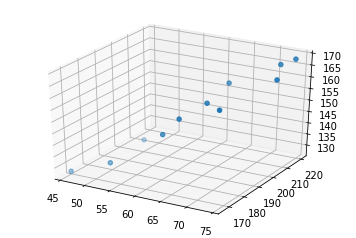

only use X2, r_square =  0.9578407208147355
only use X3, r_square =  0.9419952085293065
use both, r_square =  0.9768471041502091


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# blood, year, weight
df = pd.read_excel('mlr02.xls')
df['ones'] = 1

Y = df[['X1']]
X = df[['X2', 'X3', 'ones']]
X2_only = df[['X2', 'ones']]
X3_only = df[['X3', 'ones']]

# plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X2_only)[:,0], np.array(X3_only)[:,0], np.array(Y))
plt.show()

def find_r2_square(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    
    yhat = X.dot(w)
    d1 = (Y - yhat).squeeze()
    d2 = (Y - Y.mean()).squeeze()
    r_square = 1 - d1.dot(d1) / d2.dot(d2)
    return r_square

print('only use X2, r_square = ', find_r2_square(X2_only, Y))
print('only use X3, r_square = ', find_r2_square(X3_only, Y))
print('use both, r_square = ', find_r2_square(X, Y))